### Import important Python Libaries 

In [1]:
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn import metrics

def printmd(string):
    display(Markdown(string))
       
%  matplotlib inline

#### 1. Load the dataset  ( Train and Test set )

In [2]:
df_train= pd.read_csv("C:/Users/kouame/Desktop/DATASCIENCE PIELINE/ONLINE COURSE/SIMPLILEARN/Machine Learning/Projects/Projects for submission/Mercedes Benz project/train.csv")
df_test= pd.read_csv("C:/Users/kouame/Desktop/DATASCIENCE PIELINE/ONLINE COURSE/SIMPLILEARN/Machine Learning/Projects/Projects for submission/Mercedes Benz project/test.csv")
print("Train shape : ", df_train.shape)
print("Test shape : ", df_test.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


In [3]:

print('Size of training set: {} rows and {} columns'.format(*df_train.shape))
df_train.head()

Size of training set: 4209 rows and 378 columns


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Let's check the nature of the different varaibles by using the info method 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
dtype_df = df_train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()


,Column Type,Count
0,int64,369
1,float64,1
2,object,8


<p> We have 369 int64 variables, 1 float64 variables and  8 object variables</p>

In [6]:
# The summary Statistic of the numerical variables  using describe method
df_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#The summary statistic od the categorical variables using describe method 
df_train.describe(include= ["object"])

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [8]:
 # Check the label of the categorical variables  of the train set 
for col_name in df_train.columns:
    if df_train[col_name].dtypes == 'object':
        unique_cat = len(df_train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'X0' has 47 unique categories
Feature 'X1' has 27 unique categories
Feature 'X2' has 44 unique categories
Feature 'X3' has 7 unique categories
Feature 'X4' has 4 unique categories
Feature 'X5' has 29 unique categories
Feature 'X6' has 12 unique categories
Feature 'X8' has 25 unique categories


In [9]:
 # Check the label of the categorical variables  of the test  set
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object':
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'X0' has 49 unique categories
Feature 'X1' has 27 unique categories
Feature 'X2' has 45 unique categories
Feature 'X3' has 7 unique categories
Feature 'X4' has 4 unique categories
Feature 'X5' has 32 unique categories
Feature 'X6' has 12 unique categories
Feature 'X8' has 25 unique categories


<p> we can see that the following categorical variable (X0, X2, X5)  do not have the same labels in the train and test set</p> 

#### 2. Check the  different categories of the variables in the train set 

In [10]:
df_train.X0.value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
am     18
i      18
aq     18
u      17
l      16
aw     16
ad     14
k      11
au     11
b      11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
g       1
ac      1
ab      1
Name: X0, dtype: int64

In [12]:
df_train.X1.value_counts()

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
f      23
y      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64

In [13]:
df_train.X2.value_counts()

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
z       19
ag      19
d       18
ac      13
g       12
y       11
ap      11
x       10
aw       8
at       6
h        6
an       5
al       5
q        5
ah       4
av       4
p        4
au       3
j        1
l        1
af       1
am       1
c        1
aa       1
o        1
ar       1
Name: X2, dtype: int64

In [14]:
df_train.X3.value_counts()

c    1942
f    1076
a     440
d     290
g     241
e     163
b      57
Name: X3, dtype: int64

In [15]:
df_train.X4.value_counts()

d    4205
a       2
b       1
c       1
Name: X4, dtype: int64

In [16]:
df_train.X5.value_counts()

w     231
v     231
q     220
r     215
s     214
d     214
n     212
p     208
m     208
i     207
ae    205
ag    204
ac    200
ab    197
l     195
af    188
ad    185
k     177
c     131
j     125
aa    112
ah     97
o      20
f       7
x       2
h       1
u       1
y       1
g       1
Name: X5, dtype: int64

In [17]:
df_train.X6.value_counts()

g    1042
j    1039
d     625
i     488
l     478
a     206
h     190
k      43
c      38
b      28
f      20
e      12
Name: X6, dtype: int64

In [18]:
df_train.X8.value_counts()

j    277
s    255
f    243
n    242
i    237
e    225
r    219
a    210
w    196
v    194
b    190
k    176
o    163
m    155
g    130
u    119
t    119
q    117
h    117
y    116
x    105
d    103
l    101
c    100
p    100
Name: X8, dtype: int64

#### 3. Visualize the labels of the categorical variables

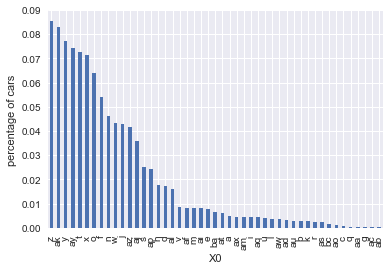

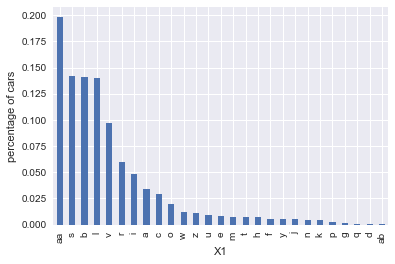

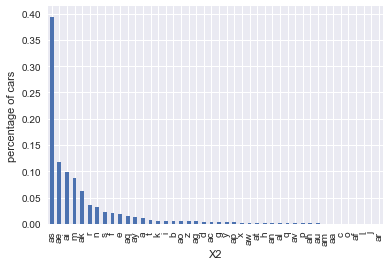

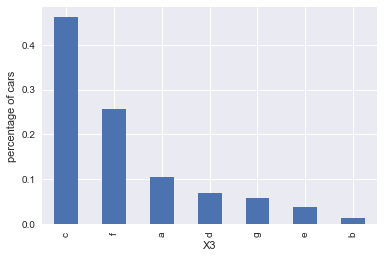

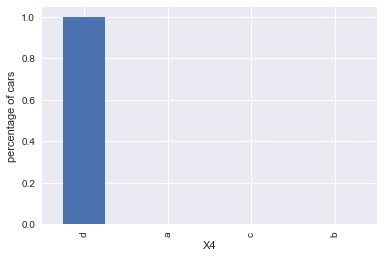

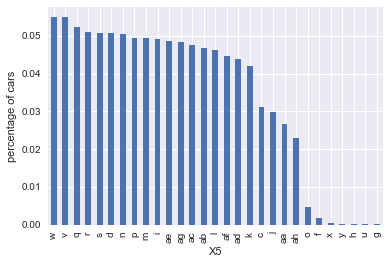

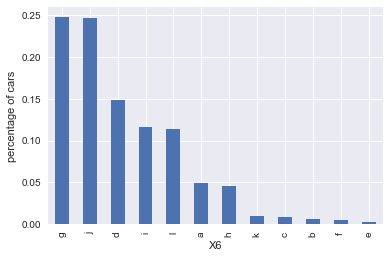

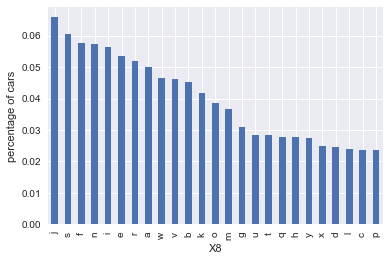

In [19]:
total_cars=len(df_train)
for col_name in df_train.columns:
    if df_train[col_name].dtypes == 'object':
        temp_df= pd.Series(df_train[col_name].value_counts()/total_cars)
        fig = temp_df.sort_values(ascending =False).plot.bar()              
        fig.set_xlabel(col_name)
        fig.set_ylabel("percentage of cars")
        plt.show()
      

<p> The labels of some  variables  appear in less than 10 % or even 5% of the observations.</p> 
<p> We have to look up closely these labels to avoid overfitting.</p> 

### 4. Analyze the target variable (y)

min: 72.11 max: 265.32 mean: 100.66931812782134 std: 12.6778749695168


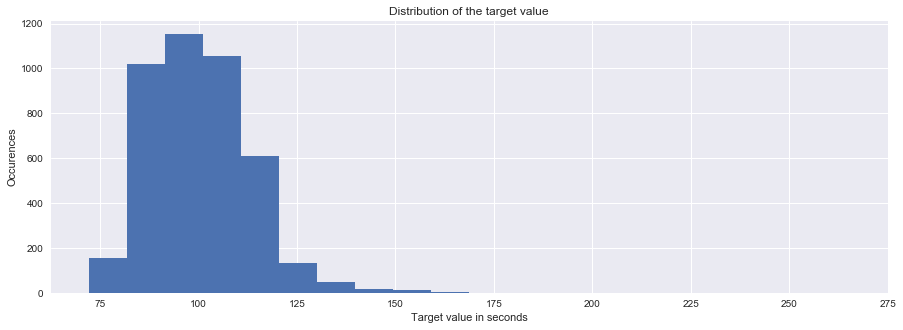

In [20]:
y_train = df_train['y'].values
plt.figure(figsize=(15, 5))
plt.hist(y_train, bins=20)
plt.xlabel('Target value in seconds')
plt.ylabel('Occurences')
plt.title('Distribution of the target value')

print('min: {} max: {} mean: {} std: {}'.format(min(y_train), max(y_train), y_train.mean(), y_train.std()))


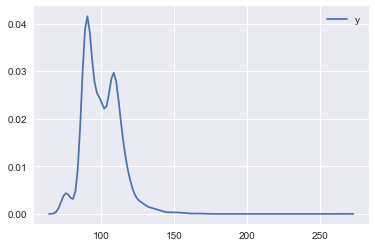

In [21]:
# The Kdeplot of the target variabkes  
sns.kdeplot(df_train["y"])

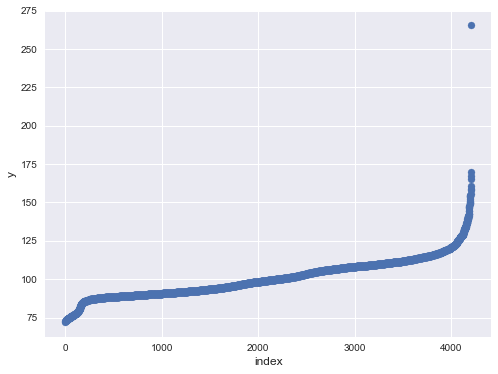

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(range(df_train.shape[0]), np.sort(df_train.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

<p> The scatter plot shows only one data point above the rest of the observations </p>

#### 5.The distribution of categorical variables  with  the outcome variable (y)

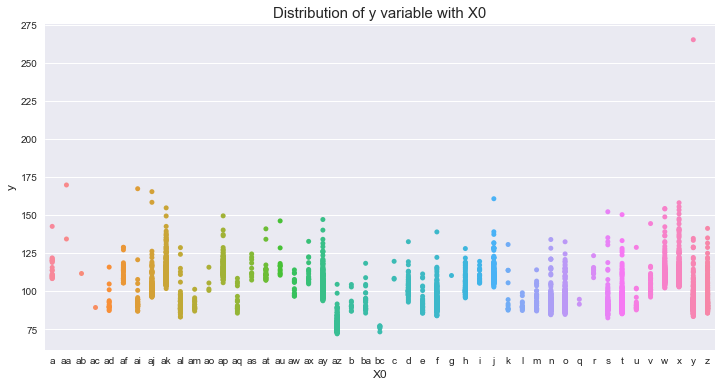

In [23]:
var_name = "X0"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

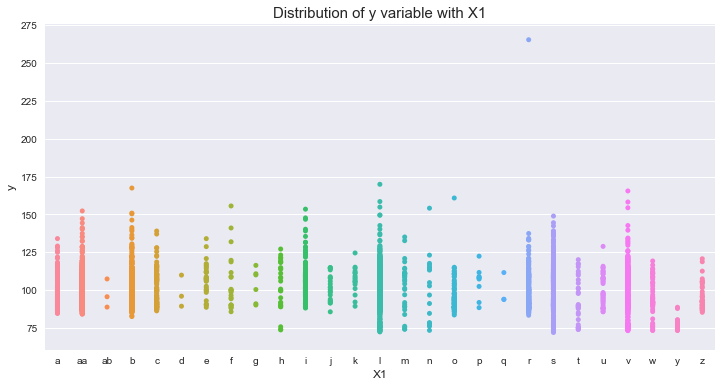

In [24]:
var_name = "X1"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

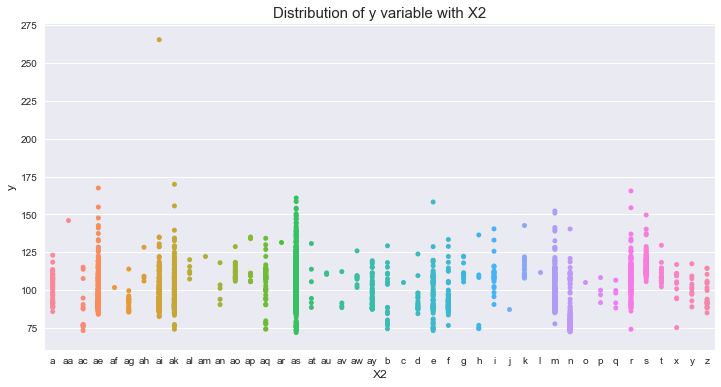

In [25]:
var_name = "X2"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

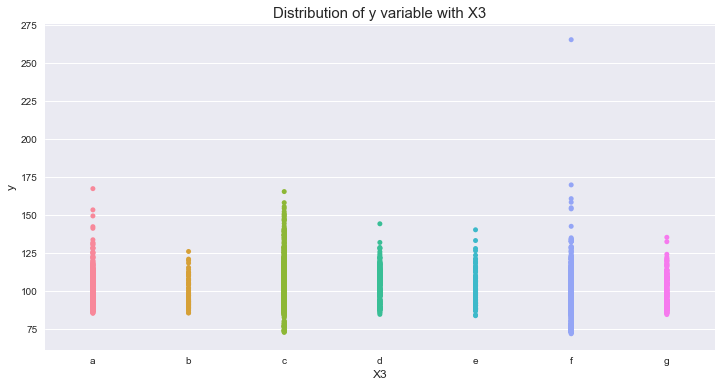

In [26]:
var_name = "X3"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

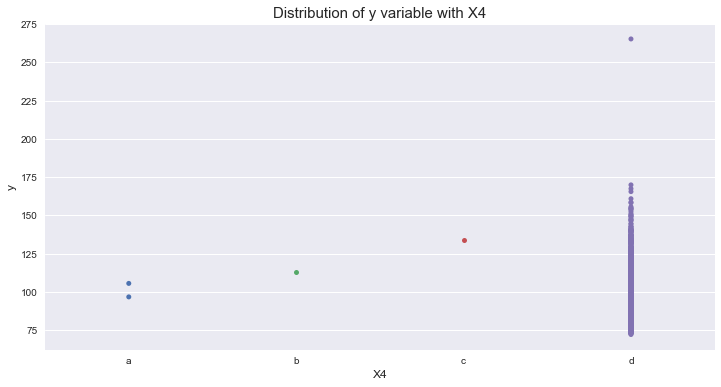

In [27]:
var_name = "X4"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

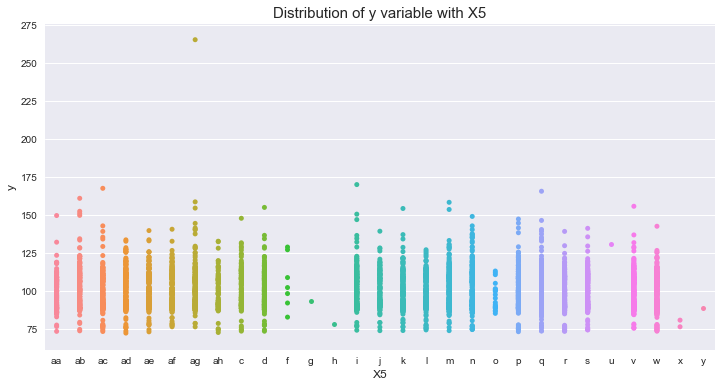

In [28]:
var_name = "X5"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

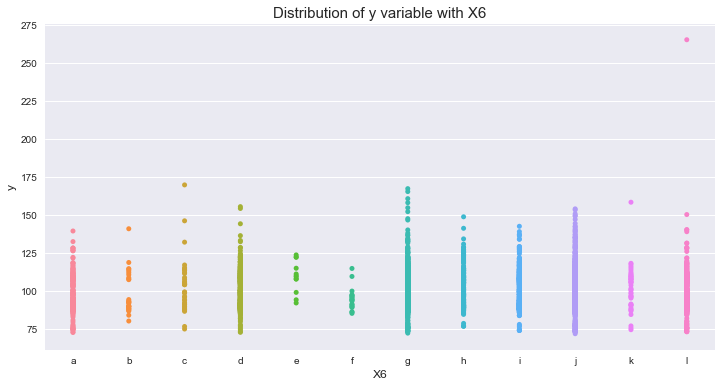

In [29]:
var_name = "X6"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

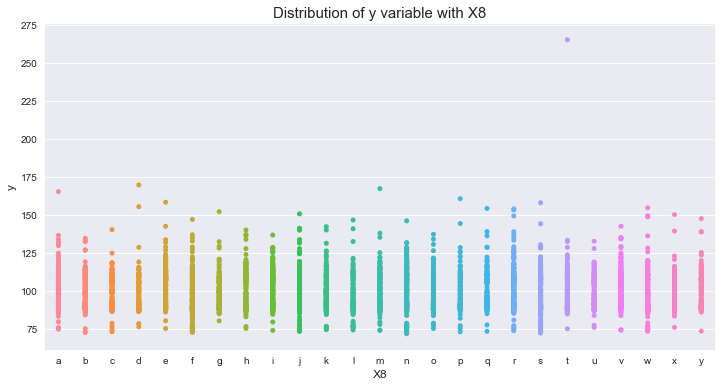

In [30]:
var_name = "X8"
col_order = np.sort(df_train[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=df_train, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

#### 6. Check for null and unique values  in the test  and train set

In [31]:
missing_df = df_train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


<p> We do not have null variables in the train set </p>

In [32]:
missing_df = df_test.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df


,column_name,missing_count


<p> We do not have  missing values in the test set </p>

#### 7. Check the variable that  the  variance is equal to zero

In [33]:
Variance_Zero = [feat for feat in df_train.columns.drop(["ID", "y", "X0", "X1","X2","X3","X4", "X5","X6","X8"]) if df_train[feat].var()==0]

# The list of the variable that I drop is  made of categorical variables. We can calculate the variance of the categorical variables 

In [34]:
print(Variance_Zero)

['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [35]:
len(Variance_Zero)# We have 12 variables that the variance is equal to zero 

12

###### 7.1  Remove the variables  that the variance is equal to zero 

In [36]:
# Now we can drop these variables from the train set 
df_train.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'], axis=1, inplace=True)


In [37]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [38]:
len(df_train.columns)

366

In [39]:
 df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# get the dummies variables of the categorical variables 
df_train1= pd.get_dummies(df_train[["X0","X1","X2","X3","X4","X5","X6","X8"]])

In [41]:
df_train1.head() # the fice first rows 

,X0_a,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Concatenate the dummies variables and the original train set 

df_train = pd.concat( [df_train, df_train1], axis=1).drop(["X0", "X1","X2","X3","X4", "X5","X6","X8"], axis=1)

In [43]:
# the independent variables and target variable 
X = df_train.drop(["ID", "y"], axis=1)

In [44]:
# the independent Varaibles 
X.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# the target varaibles 
y= df_train.y

In [46]:
## remove variable with variance _zero in the  test set 

In [47]:
df_test.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'], axis=1, inplace=True)

In [48]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [49]:
X_test= df_test

In [50]:
X_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [51]:
X_test1 = pd.get_dummies(X_test[["X0","X1","X2","X3","X4","X5","X6","X8"]])

In [52]:
X_test1.head()

,X0_a,X0_ad,X0_ae,X0_af,X0_ag,X0_ai,X0_aj,X0_ak,X0_al,X0_am,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X_test = pd.concat( [X_test, X_test1], axis=1).drop(["X0", "X1","X2","X3","X4", "X5","X6","X8"], axis=1)

In [54]:
X_test.head().drop("ID",axis=1, inplace=True)

C:\Users\kouame\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### 8.Perform  dimensionality reduction

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50,whiten=True )  
X = pca.fit_transform(X)  
  

In [56]:
print(pca.components_)

[[ 0.00319096 -0.00568091 -0.01336718 ...,  0.00519414  0.00382325
   0.00015245]
 [-0.0013064  -0.02312814 -0.00940537 ..., -0.01244166 -0.00646874
   0.00218646]
 [-0.00782005 -0.00672789  0.05110197 ..., -0.00322586 -0.00904268
   0.00315632]
 ..., 
 [-0.0403022  -0.0662957  -0.06400198 ..., -0.04444383  0.02153157 -0.01002   ]
 [ 0.01425368  0.04206451 -0.01805061 ..., -0.04840954 -0.03948275
  -0.00192419]
 [-0.02069008  0.02230906  0.02074485 ..., -0.00639697  0.00559926
  -0.00722873]]


In [57]:
pca.explained_variance_

array([ 3.26297975,  2.24652561,  2.11951673,  1.68454096,  1.42385186,
        1.20746941,  0.95344826,  0.81439793,  0.72457837,  0.62031501,
        0.59845102,  0.49690725,  0.43359583,  0.4134095 ,  0.39900732,
        0.37353168,  0.34723023,  0.31480197,  0.28350302,  0.26305077,
        0.25446892,  0.24305003,  0.23712795,  0.22258912,  0.21414232,
        0.20088476,  0.19974364,  0.18932408,  0.18397907,  0.18136395,
        0.16602609,  0.15975564,  0.14997531,  0.13869789,  0.13656357,
        0.12742784,  0.12583596,  0.12095789,  0.1181025 ,  0.1164    ,
        0.10912883,  0.10875443,  0.10710024,  0.10106922,  0.09995406,
        0.09633208,  0.09262093,  0.09015154,  0.08673295,  0.08368595])

In [58]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [59]:

data_dmatrix = xgb.DMatrix(data=X,label=y)


In [60]:
# split the train set  
X_train,X_valid, y_train, y_valid = train_test_split(X , y, test_size=  0.2, random_state=0)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((3367, 50), (842, 50), (3367,), (842,))

In [61]:
# create a Xgboot Object 
Xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [62]:
# train Xgboostregressor  
Xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [63]:
# predict the trget variable
y_preds = Xg_reg.predict(X_valid)

In [64]:
#  The Mean Squered error 
rmse = np.sqrt(mean_squared_error(y_valid, y_preds))
print("RMSE: %f" % (rmse))

RMSE: 37.494547


### 9.Prediction using the X_test

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50,whiten=True )  
X_test = pca.fit_transform(X_test)  
  

In [67]:
print(pca.components_)

[[ -9.99999993e-01   9.11142891e-07  -4.67398679e-06 ...,  -4.34642001e-07
    1.01946175e-06  -1.31770474e-06]
 [ -4.27647446e-06   4.94171391e-03  -3.75117553e-03 ...,   6.43427302e-03
    4.91058282e-03  -6.56978699e-04]
 [  6.29350106e-06  -1.09205703e-02  -9.76435343e-03 ...,  -7.79971990e-03
   -1.36236490e-02   5.34080005e-03]
 ..., 
 [ -1.07712707e-07   3.36559772e-03   8.59667910e-02 ...,   6.36863179e-02
   -2.02602670e-02   1.28607460e-02]
 [  6.21476024e-06   4.70641256e-03   9.93118747e-02 ...,  -6.30044237e-02
   -2.60589369e-02   2.08565183e-03]
 [ -2.53236256e-06   3.88331365e-02   3.89829135e-02 ...,   4.24382219e-02
   -8.67163495e-04  -3.50249449e-03]]


In [68]:
pca.explained_variance_

array([  5.86991663e+06,   3.47803533e+00,   2.20191939e+00,
         2.07657486e+00,   1.66117798e+00,   1.43210957e+00,
         1.14926752e+00,   9.82881709e-01,   8.37847227e-01,
         6.99434834e-01,   6.33284381e-01,   5.78905535e-01,
         4.69042397e-01,   4.27356610e-01,   4.20488247e-01,
         3.92133031e-01,   3.64108430e-01,   3.39492511e-01,
         3.07318246e-01,   2.80857946e-01,   2.73880204e-01,
         2.56035624e-01,   2.39267011e-01,   2.31346478e-01,
         2.23925144e-01,   2.13272622e-01,   2.08233611e-01,
         2.06706077e-01,   1.93434413e-01,   1.86735198e-01,
         1.80066204e-01,   1.63726249e-01,   1.52254991e-01,
         1.46855591e-01,   1.42919301e-01,   1.37413852e-01,
         1.28295047e-01,   1.25680678e-01,   1.20868127e-01,
         1.17253867e-01,   1.14962749e-01,   1.07705200e-01,
         1.05977368e-01,   1.01603043e-01,   9.82004341e-02,
         9.69918743e-02,   9.23567775e-02,   9.11330396e-02,
         9.04891249e-02,

In [70]:
X_test.dtype

dtype('float64')

In [72]:
y_prediction= Xg_reg.predict(X_test)

In [73]:
y_prediction

array([ 68.33293915,  67.42971802,  67.20080566, ...,  67.24980927,
        67.42684174,  64.89639282], dtype=float32)

In [75]:
y_prediction1= list(y_prediction)

In [76]:
y_prediction1

[68.332939,
 67.429718,
 67.200806,
 66.669228,
 61.886883,
 62.26012,
 64.92009,
 63.61837,
 55.404911,
 65.598152,
 55.404911,
 65.522362,
 62.879635,
 64.182144,
 63.196201,
 62.879635,
 57.581745,
 62.879635,
 66.739609,
 65.64888,
 62.879635,
 62.879635,
 66.153343,
 62.879635,
 64.63607,
 55.404911,
 62.534489,
 61.507748,
 64.894371,
 63.698536,
 62.414993,
 66.604553,
 63.895424,
 66.721046,
 64.10675,
 65.187164,
 67.365791,
 62.770512,
 66.133392,
 63.364769,
 62.285904,
 64.363968,
 64.10675,
 63.485233,
 59.997391,
 64.363968,
 62.770512,
 63.277752,
 61.507748,
 63.420429,
 62.879635,
 66.273972,
 64.209534,
 65.463234,
 64.057396,
 66.668327,
 64.205711,
 62.045815,
 65.458107,
 65.977242,
 63.730991,
 66.273972,
 65.85508,
 63.736343,
 65.459778,
 65.978218,
 65.093727,
 64.26339,
 66.668327,
 66.273972,
 62.333229,
 61.510578,
 62.879635,
 64.968674,
 66.492226,
 66.433495,
 64.431366,
 60.626286,
 63.880516,
 66.604553,
 68.321404,
 63.582428,
 61.965088,
 63.129818,
 

In [81]:
# Choose the  842 elements of the list  

y_pred = y_prediction1[0:842]


In [82]:
len(y_pred)

842

In [83]:
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 39.215798
